<a href="https://colab.research.google.com/github/JordanCity/Data-Analytics/blob/main/Masters_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the Beginning of the implementations stage of my project.
We begin by importing the necessary Libraries involved.

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

We Load our Fifa 22 dataset into our dataframe

In [2]:
df = pd.read_csv('/content/fifa_players_22.csv', low_memory=False, encoding='latin-1')


In [3]:
df.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
3,200389,https://sofifa.com/player/200389/jan-oblak/220002,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,...,33+3,33+3,33+3,32+3,89+3,https://cdn.sofifa.net/players/200/389/22_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/si.png
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png


In [4]:
df = df[df.columns.drop(list(df.filter(regex='url')))]
df.shape

(19239, 104)

In [5]:
df.dtypes

sofifa_id            int64
short_name          object
long_name           object
player_positions    object
overall              int64
                     ...  
lcb                 object
cb                  object
rcb                 object
rb                  object
gk                  object
Length: 104, dtype: object

In [6]:
cols_to_drop = []
for i in df.columns:
    missing = np.abs((df[i].count() - df[i].shape[0])/df[i].shape[0] * 100)
    if missing > 50:
        print('{} - {}%'.format(i, round(missing)))
        cols_to_drop.append(i)

club_loaned_from - 94%
nation_team_id - 96%
nation_position - 96%
nation_jersey_number - 96%
player_tags - 93%
player_traits - 51%
goalkeeping_speed - 89%


In [7]:
df.drop(columns=cols_to_drop,inplace=True)
print(df.shape)

(19239, 97)


<ipython-input-7-327620f9b8b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=cols_to_drop,inplace=True)


In [8]:
df.rename(columns={'skill_moves':'skills'},inplace=True)

<ipython-input-8-73f1d7b7d5c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'skill_moves':'skills'},inplace=True)


In [9]:
filter = ['sofifa_id','skill_','movement_','defending_','attacking_','power_','mentality_']

for i in filter:
    df = df[df.columns.drop(list(df.filter(regex=i)))]

df.shape

(19239, 67)

In [10]:
df.columns

Index(['short_name', 'long_name', 'player_positions', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg',
       'club_team_id', 'club_name', 'league_name', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined',
       'club_contract_valid_until', 'nationality_id', 'nationality_name',
       'preferred_foot', 'weak_foot', 'skills', 'international_reputation',
       'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk'],
      dtype='object')

In [11]:
attributes_df = df[['short_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur','club_contract_valid_until', 'release_clause_eur',
                    'age', 'height_cm', 'weight_kg', 'club_name', 'league_name', 'league_level', 'nationality_name', 'international_reputation',
                    'work_rate', 'preferred_foot', 'weak_foot', 'skills', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
                    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes',]]

In [12]:
attributes_df.rename(columns={'physic':'physical'},inplace=True)

<ipython-input-12-166b8f6ca07e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attributes_df.rename(columns={'physic':'physical'},inplace=True)


In [13]:
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   short_name                 19239 non-null  object 
 1   player_positions           19239 non-null  object 
 2   overall                    19239 non-null  int64  
 3   potential                  19239 non-null  int64  
 4   value_eur                  19165 non-null  float64
 5   wage_eur                   19178 non-null  float64
 6   club_contract_valid_until  19178 non-null  float64
 7   release_clause_eur         18063 non-null  float64
 8   age                        19239 non-null  int64  
 9   height_cm                  19239 non-null  int64  
 10  weight_kg                  19239 non-null  int64  
 11  club_name                  19178 non-null  object 
 12  league_name                19178 non-null  object 
 13  league_level               19178 non-null  flo

In [14]:
hg_skills = attributes_df[attributes_df.skills == 5]
hg_skills['nationality_name'].value_counts()

Brazil                 12
France                  6
Portugal                6
Argentina               6
England                 2
Morocco                 2
Congo DR                2
Colombia                2
Ukraine                 1
Republic of Ireland     1
Gambia                  1
Thailand                1
Romania                 1
Germany                 1
Switzerland             1
Norway                  1
Côte d'Ivoire           1
Mexico                  1
Sweden                  1
Slovenia                1
Netherlands             1
Algeria                 1
Spain                   1
Scotland                1
Name: nationality_name, dtype: int64

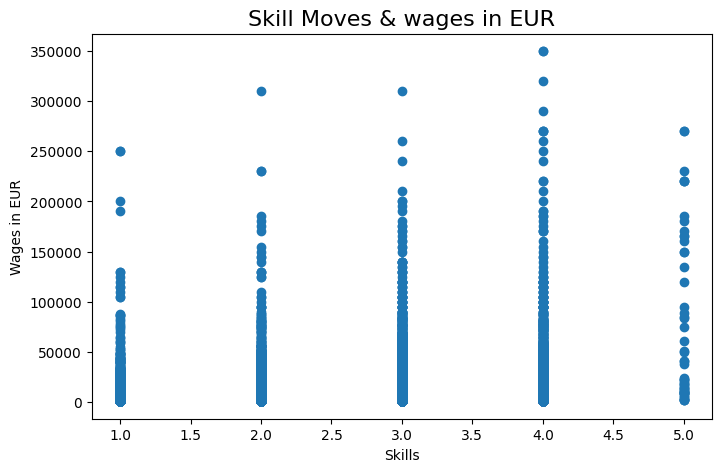

In [15]:

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = attributes_df, x= 'skills', y='wage_eur')
plt.xlabel("Skills")
plt.ylabel("Wages in EUR")
plt.title("Skill Moves & wages in EUR", fontsize = 16)
plt.show()

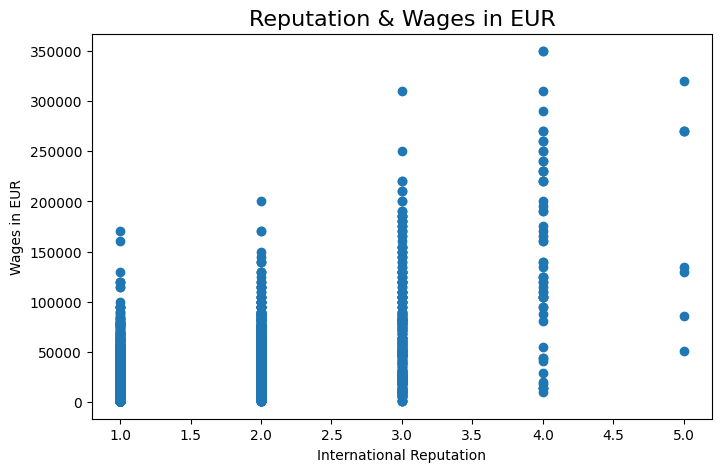

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = attributes_df, x= 'international_reputation', y='wage_eur')
plt.xlabel("International Reputation")
plt.ylabel("Wages in EUR")
plt.title("Reputation & Wages in EUR", fontsize = 16)
plt.show()

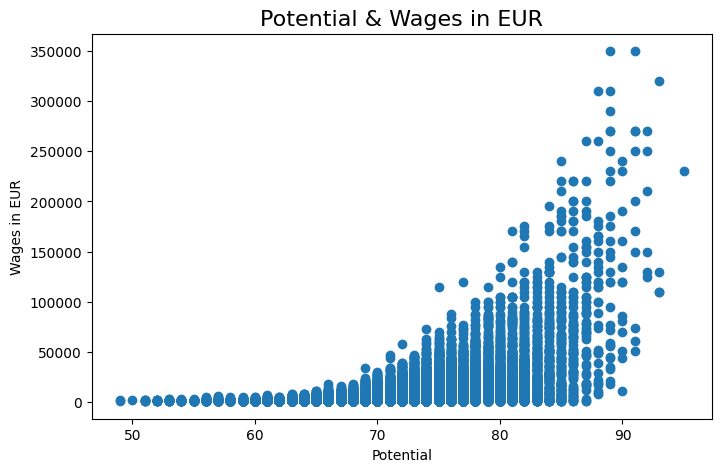

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = attributes_df, x= 'potential', y='wage_eur')
plt.xlabel("Potential")
plt.ylabel("Wages in EUR")
plt.title("Potential & Wages in EUR", fontsize = 16)
plt.show()

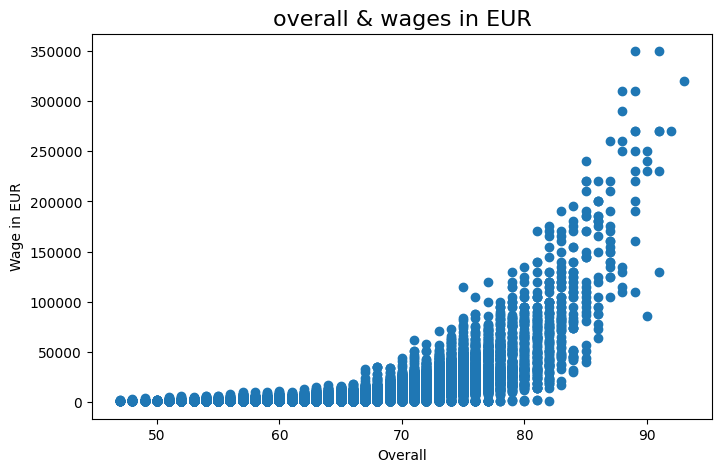

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = df, x= 'overall', y='wage_eur')
plt.xlabel("Overall")
plt.ylabel("Wage in EUR")
plt.title("overall & wages in EUR", fontsize = 16)
plt.show()

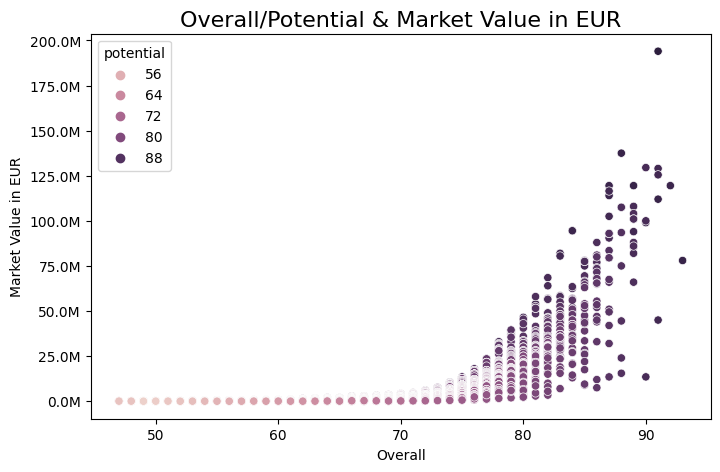

In [19]:
from matplotlib.ticker import FuncFormatter


fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data = attributes_df, x= 'overall', y='value_eur', hue= "potential")

def millions_formatter(x, pos):
    'The two args are the value and tick position'
    return f'{x / 1e6:.1f}M'

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlabel("Overall")
plt.ylabel("Market Value in EUR")
plt.title("Overall/Potential & Market Value in EUR", fontsize = 16)
plt.show()


The Data Cleaning Process Begins here

In [20]:
attributes_df.isnull().sum()

short_name                      0
player_positions                0
overall                         0
potential                       0
value_eur                      74
wage_eur                       61
club_contract_valid_until      61
release_clause_eur           1176
age                             0
height_cm                       0
weight_kg                       0
club_name                      61
league_name                    61
league_level                   61
nationality_name                0
international_reputation        0
work_rate                       0
preferred_foot                  0
weak_foot                       0
skills                          0
pace                         2132
shooting                     2132
passing                      2132
dribbling                    2132
defending                    2132
physical                     2132
goalkeeping_diving              0
goalkeeping_handling            0
goalkeeping_kicking             0
goalkeeping_po

In [21]:
selected_cols= ['short_name', 'age', 'overall', 'potential', 'club_name', 'league_name', 'league_level']
subset = attributes_df[selected_cols]

null_rows = subset.query('club_name != club_name or league_name != league_name or league_level != league_level')
null_rows.info

<bound method DataFrame.info of             short_name  age  overall  potential club_name league_name  \
194    T. Alderweireld   32       83         83       NaN         NaN   
482      G. Krychowiak   31       80         80       NaN         NaN   
830          A. Dzyuba   32       78         78       NaN         NaN   
1013         M. Ozdoev   28       77         78       NaN         NaN   
1363       V. Claesson   29       76         76       NaN         NaN   
...                ...  ...      ...        ...       ...         ...   
12754      O. Valakari   21       63         68       NaN         NaN   
13357     B. Sævarsson   36       63         63       NaN         NaN   
13398      M. Stamenic   19       62         80       NaN         NaN   
15033         P. Soiri   26       61         62       NaN         NaN   
15079          S. Roux   28       61         61       NaN         NaN   

       league_level  
194             NaN  
482             NaN  
830             NaN  
101

In [22]:
attributes_df=attributes_df.dropna(subset=['club_name','league_name', 'league_level'])
attributes_df.isnull().sum()

short_name                      0
player_positions                0
overall                         0
potential                       0
value_eur                      13
wage_eur                        0
club_contract_valid_until       0
release_clause_eur           1115
age                             0
height_cm                       0
weight_kg                       0
club_name                       0
league_name                     0
league_level                    0
nationality_name                0
international_reputation        0
work_rate                       0
preferred_foot                  0
weak_foot                       0
skills                          0
pace                         2124
shooting                     2124
passing                      2124
dribbling                    2124
defending                    2124
physical                     2124
goalkeeping_diving              0
goalkeeping_handling            0
goalkeeping_kicking             0
goalkeeping_po

In [23]:
selected_cols= ['short_name', 'age', 'overall', 'potential', 'value_eur']
subset = attributes_df[selected_cols]

null_rows = subset.query('value_eur != value_eur')
print(null_rows)

            short_name  age  overall  potential  value_eur
1964   A. D'Alessandro   40       75         75        NaN
1965           J. Sand   40       75         75        NaN
3092      M. Rodríguez   40       73         73        NaN
6402      Rubén Castro   40       69         69        NaN
6403          L. Licht   40       69         69        NaN
8665         ?. Öztürk   40       67         67        NaN
8666         Zheng Zhi   40       67         67        NaN
8667       P. Da Silva   41       67         67        NaN
13370      S. Nakamura   43       63         63        NaN
16504         K. Miura   54       59         59        NaN
16994           S. Ono   41       58         58        NaN
16995       K. Ellison   42       58         58        NaN
17795        C. Dundas   40       56         56        NaN


In [24]:
attributes_df=attributes_df.dropna(subset=['value_eur'])
attributes_df.isnull().sum()

short_name                      0
player_positions                0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
club_contract_valid_until       0
release_clause_eur           1102
age                             0
height_cm                       0
weight_kg                       0
club_name                       0
league_name                     0
league_level                    0
nationality_name                0
international_reputation        0
work_rate                       0
preferred_foot                  0
weak_foot                       0
skills                          0
pace                         2124
shooting                     2124
passing                      2124
dribbling                    2124
defending                    2124
physical                     2124
goalkeeping_diving              0
goalkeeping_handling            0
goalkeeping_kicking             0
goalkeeping_po

In [25]:
selected_cols= ['short_name', 'age', 'overall', 'potential', 'release_clause_eur']
subset = attributes_df[selected_cols]
null_rows = subset.query('release_clause_eur != release_clause_eur')
print(null_rows)

         short_name  age  overall  potential  release_clause_eur
85     A. Griezmann   30       85         85                 NaN
141       F. Chiesa   23       83         91                 NaN
169          Morata   28       83         83                 NaN
209       C. Romero   23       82         87                 NaN
219      P. Gollini   26       82         87                 NaN
...             ...  ...      ...        ...                 ...
18939   M. Al Bishi   21       51         65                 NaN
18945      S. Ghosh   20       51         64                 NaN
18980     Lin Guoyu   21       51         59                 NaN
19059      N. Singh   22       50         61                 NaN
19211       P. Kyum   20       48         53                 NaN

[1102 rows x 5 columns]


In [26]:
attributes_df['release_clause_eur'] = attributes_df['release_clause_eur'].fillna(0)
attributes_df.isnull().sum()

<ipython-input-26-3aefb105c513>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attributes_df['release_clause_eur'] = attributes_df['release_clause_eur'].fillna(0)


short_name                      0
player_positions                0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
club_contract_valid_until       0
release_clause_eur              0
age                             0
height_cm                       0
weight_kg                       0
club_name                       0
league_name                     0
league_level                    0
nationality_name                0
international_reputation        0
work_rate                       0
preferred_foot                  0
weak_foot                       0
skills                          0
pace                         2124
shooting                     2124
passing                      2124
dribbling                    2124
defending                    2124
physical                     2124
goalkeeping_diving              0
goalkeeping_handling            0
goalkeeping_kicking             0
goalkeeping_po

In [27]:
selected_cols= ['short_name', 'player_positions', 'age', 'overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physical' ]
subset = attributes_df[selected_cols]
null_rows = subset.query('pace != pace or shooting != shooting or passing != passing or dribbling != dribbling or defending != defending or physical != physical')
print(null_rows)

          short_name player_positions  age  overall  potential  pace  \
3           J. Oblak               GK   28       91         93   NaN   
7      M. ter Stegen               GK   29       90         92   NaN   
10          M. Neuer               GK   35       90         90   NaN   
11     G. Donnarumma               GK   22       89         93   NaN   
12           Ederson               GK   27       89         91   NaN   
...              ...              ...  ...      ...        ...   ...   
19208      Gao Xiang               GK   20       48         54   NaN   
19218        Ma Zhen               GK   23       48         52   NaN   
19221      A. Shaikh               GK   18       47         67   NaN   
19235    D. Da Silva               GK   21       47         55   NaN   
19237          R. By               GK   22       47         55   NaN   

       shooting  passing  dribbling  defending  physical  
3           NaN      NaN        NaN        NaN       NaN  
7           NaN  

In [28]:
null_rows.value_counts('player_positions')

player_positions
GK    2124
dtype: int64

In [29]:
attributes_df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physical']] = attributes_df[[
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physical']].fillna(0)
attributes_df.isnull().sum()

<ipython-input-29-944206a91ce8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attributes_df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physical']] = attributes_df[[


short_name                   0
player_positions             0
overall                      0
potential                    0
value_eur                    0
wage_eur                     0
club_contract_valid_until    0
release_clause_eur           0
age                          0
height_cm                    0
weight_kg                    0
club_name                    0
league_name                  0
league_level                 0
nationality_name             0
international_reputation     0
work_rate                    0
preferred_foot               0
weak_foot                    0
skills                       0
pace                         0
shooting                     0
passing                      0
dribbling                    0
defending                    0
physical                     0
goalkeeping_diving           0
goalkeeping_handling         0
goalkeeping_kicking          0
goalkeeping_positioning      0
goalkeeping_reflexes         0
dtype: int64

We begin other adding other pre-processing technniques

In [30]:
#Splitting the workrate column into attacking and defensive workrate
attributes_df[['att_workrate','def_workrate']] = attributes_df['work_rate'].str.split('/',expand=True)
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19165 entries, 0 to 19238
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   short_name                 19165 non-null  object 
 1   player_positions           19165 non-null  object 
 2   overall                    19165 non-null  int64  
 3   potential                  19165 non-null  int64  
 4   value_eur                  19165 non-null  float64
 5   wage_eur                   19165 non-null  float64
 6   club_contract_valid_until  19165 non-null  float64
 7   release_clause_eur         19165 non-null  float64
 8   age                        19165 non-null  int64  
 9   height_cm                  19165 non-null  int64  
 10  weight_kg                  19165 non-null  int64  
 11  club_name                  19165 non-null  object 
 12  league_name                19165 non-null  object 
 13  league_level               19165 non-null  flo

In [31]:
attributes_df.insert(17, 'att_workrate', (attributes_df.pop('att_workrate')))
attributes_df.insert(18, 'def_workrate', (attributes_df.pop('def_workrate')))
attributes_df.drop(['work_rate'], axis=1, inplace=True)
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19165 entries, 0 to 19238
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   short_name                 19165 non-null  object 
 1   player_positions           19165 non-null  object 
 2   overall                    19165 non-null  int64  
 3   potential                  19165 non-null  int64  
 4   value_eur                  19165 non-null  float64
 5   wage_eur                   19165 non-null  float64
 6   club_contract_valid_until  19165 non-null  float64
 7   release_clause_eur         19165 non-null  float64
 8   age                        19165 non-null  int64  
 9   height_cm                  19165 non-null  int64  
 10  weight_kg                  19165 non-null  int64  
 11  club_name                  19165 non-null  object 
 12  league_name                19165 non-null  object 
 13  league_level               19165 non-null  flo

In [32]:
#Converting the Player position to the first primary position to use for encoding.
attributes_df['player_positions'] = attributes_df['player_positions'].apply(lambda x: x.split(',')[0].strip())

unique_positions = attributes_df['player_positions'].unique()
attributes_df.rename(columns={'player_positions': 'player_position'}, inplace=True)
attributes_df.rename(columns={'short_name': 'name'}, inplace=True)
print(unique_positions)

['RW' 'ST' 'GK' 'LW' 'CM' 'CDM' 'LM' 'CB' 'CF' 'CAM' 'RB' 'RM' 'LB' 'LWB'
 'RWB']


In [33]:
attributes_df

,name,player_position,overall,potential,value_eur,wage_eur,club_contract_valid_until,release_clause_eur,age,height_cm,...,shooting,passing,dribbling,defending,physical,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,RW,93,93,78000000.0,320000.0,2023.0,144300000.0,34,170,...,92.0,91.0,95.0,34.0,65.0,6,11,15,14,8
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,2023.0,197200000.0,32,185,...,92.0,79.0,86.0,44.0,82.0,15,6,12,8,10
2,K. Mbappé,ST,91,95,194000000.0,230000.0,2022.0,373500000.0,22,182,...,88.0,80.0,92.0,36.0,77.0,13,5,7,11,6
3,J. Oblak,GK,91,93,112000000.0,130000.0,2023.0,238000000.0,28,188,...,0.0,0.0,0.0,0.0,0.0,87,92,78,90,90
4,Neymar Jr,LW,91,91,129000000.0,270000.0,2025.0,238700000.0,29,175,...,83.0,86.0,94.0,37.0,63.0,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Hu Xingyu,CM,47,55,100000.0,800.0,2025.0,175000.0,19,178,...,33.0,47.0,45.0,39.0,55.0,8,14,9,8,12
19235,D. Da Silva,GK,47,55,90000.0,500.0,2025.0,140000.0,21,175,...,0.0,0.0,0.0,0.0,0.0,48,45,45,46,47
19236,N. Logue,CM,47,55,100000.0,500.0,2021.0,175000.0,21,178,...,37.0,45.0,49.0,41.0,52.0,8,6,7,10,6
19237,R. By,GK,47,55,90000.0,500.0,2022.0,140000.0,22,181,...,0.0,0.0,0.0,0.0,0.0,49,46,43,47,52


In [34]:
#Converting the float datatypes into integers
float_columns = attributes_df.select_dtypes(include=['float']).columns
attributes_df[float_columns] = attributes_df[float_columns].astype(int)

attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19165 entries, 0 to 19238
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   name                       19165 non-null  object
 1   player_position            19165 non-null  object
 2   overall                    19165 non-null  int64 
 3   potential                  19165 non-null  int64 
 4   value_eur                  19165 non-null  int64 
 5   wage_eur                   19165 non-null  int64 
 6   club_contract_valid_until  19165 non-null  int64 
 7   release_clause_eur         19165 non-null  int64 
 8   age                        19165 non-null  int64 
 9   height_cm                  19165 non-null  int64 
 10  weight_kg                  19165 non-null  int64 
 11  club_name                  19165 non-null  object
 12  league_name                19165 non-null  object
 13  league_level               19165 non-null  int64 
 14  nation

In [35]:
attributes_df

,name,player_position,overall,potential,value_eur,wage_eur,club_contract_valid_until,release_clause_eur,age,height_cm,...,shooting,passing,dribbling,defending,physical,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,RW,93,93,78000000,320000,2023,144300000,34,170,...,92,91,95,34,65,6,11,15,14,8
1,R. Lewandowski,ST,92,92,119500000,270000,2023,197200000,32,185,...,92,79,86,44,82,15,6,12,8,10
2,K. Mbappé,ST,91,95,194000000,230000,2022,373500000,22,182,...,88,80,92,36,77,13,5,7,11,6
3,J. Oblak,GK,91,93,112000000,130000,2023,238000000,28,188,...,0,0,0,0,0,87,92,78,90,90
4,Neymar Jr,LW,91,91,129000000,270000,2025,238700000,29,175,...,83,86,94,37,63,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Hu Xingyu,CM,47,55,100000,800,2025,175000,19,178,...,33,47,45,39,55,8,14,9,8,12
19235,D. Da Silva,GK,47,55,90000,500,2025,140000,21,175,...,0,0,0,0,0,48,45,45,46,47
19236,N. Logue,CM,47,55,100000,500,2021,175000,21,178,...,37,45,49,41,52,8,6,7,10,6
19237,R. By,GK,47,55,90000,500,2022,140000,22,181,...,0,0,0,0,0,49,46,43,47,52


In [36]:
top_players = attributes_df[attributes_df.overall >= 80]
top_players

,name,player_position,overall,potential,value_eur,wage_eur,club_contract_valid_until,release_clause_eur,age,height_cm,...,shooting,passing,dribbling,defending,physical,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,RW,93,93,78000000,320000,2023,144300000,34,170,...,92,91,95,34,65,6,11,15,14,8
1,R. Lewandowski,ST,92,92,119500000,270000,2023,197200000,32,185,...,92,79,86,44,82,15,6,12,8,10
2,K. Mbappé,ST,91,95,194000000,230000,2022,373500000,22,182,...,88,80,92,36,77,13,5,7,11,6
3,J. Oblak,GK,91,93,112000000,130000,2023,238000000,28,188,...,0,0,0,0,0,87,92,78,90,90
4,Neymar Jr,LW,91,91,129000000,270000,2025,238700000,29,175,...,83,86,94,37,63,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,Nacho Monreal,LB,80,80,6500000,26000,2022,13700000,35,180,...,61,74,74,80,68,7,5,9,3,5
505,D. Godín,CB,80,80,5500000,27000,2023,9400000,35,187,...,48,63,61,80,78,6,8,15,5,15
506,F. Muslera,GK,80,80,2300000,32000,2024,4600000,35,190,...,0,0,0,0,0,78,80,72,82,79
507,E. Pérez,CDM,80,80,6000000,15000,2023,8400000,35,178,...,66,77,77,77,78,9,11,7,15,13


In [37]:
top_players.isnull().sum()

name                         0
player_position              0
overall                      0
potential                    0
value_eur                    0
wage_eur                     0
club_contract_valid_until    0
release_clause_eur           0
age                          0
height_cm                    0
weight_kg                    0
club_name                    0
league_name                  0
league_level                 0
nationality_name             0
international_reputation     0
att_workrate                 0
def_workrate                 0
preferred_foot               0
weak_foot                    0
skills                       0
pace                         0
shooting                     0
passing                      0
dribbling                    0
defending                    0
physical                     0
goalkeeping_diving           0
goalkeeping_handling         0
goalkeeping_kicking          0
goalkeeping_positioning      0
goalkeeping_reflexes         0
dtype: i

In [38]:
top_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 508
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   name                       507 non-null    object
 1   player_position            507 non-null    object
 2   overall                    507 non-null    int64 
 3   potential                  507 non-null    int64 
 4   value_eur                  507 non-null    int64 
 5   wage_eur                   507 non-null    int64 
 6   club_contract_valid_until  507 non-null    int64 
 7   release_clause_eur         507 non-null    int64 
 8   age                        507 non-null    int64 
 9   height_cm                  507 non-null    int64 
 10  weight_kg                  507 non-null    int64 
 11  club_name                  507 non-null    object
 12  league_name                507 non-null    object
 13  league_level               507 non-null    int64 
 14  nationalit

In [39]:
young_talents = attributes_df[(attributes_df.age <= 23) & (attributes_df.potential >= 80) ]
young_talents

,name,player_position,overall,potential,value_eur,wage_eur,club_contract_valid_until,release_clause_eur,age,height_cm,...,shooting,passing,dribbling,defending,physical,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
2,K. Mbappé,ST,91,95,194000000,230000,2022,373500000,22,182,...,88,80,92,36,77,13,5,7,11,6
11,G. Donnarumma,GK,89,93,119500000,110000,2026,230000000,22,196,...,0,0,0,0,0,91,83,79,85,90
22,E. Haaland,ST,88,93,137500000,110000,2024,244100000,20,194,...,91,65,80,45,88,7,14,13,11,7
30,T. Alexander-Arnold,RB,87,92,114000000,150000,2025,219500000,22,180,...,68,88,80,80,72,14,15,14,6,7
32,J. Sancho,RM,87,91,116500000,150000,2026,224300000,21,180,...,76,82,91,36,65,7,11,10,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16508,W. Gnonto,CF,58,80,650000,650,2023,1600000,17,170,...,54,41,67,19,52,11,9,10,10,13
16509,J. Riasco,ST,58,80,650000,500,2024,2000000,17,187,...,59,48,56,27,58,13,9,10,11,7
16510,Christian Marques,CB,58,80,625000,3000,2023,1800000,18,187,...,37,52,48,59,62,15,15,7,11,7
16996,A. Devine,CM,57,82,500000,1000,2024,1500000,16,180,...,46,56,59,51,53,8,7,13,12,13


In [40]:
established_talents = young_talents[young_talents.overall >= 80]
established_talents

,name,player_position,overall,potential,value_eur,wage_eur,club_contract_valid_until,release_clause_eur,age,height_cm,...,shooting,passing,dribbling,defending,physical,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
2,K. Mbappé,ST,91,95,194000000,230000,2022,373500000,22,182,...,88,80,92,36,77,13,5,7,11,6
11,G. Donnarumma,GK,89,93,119500000,110000,2026,230000000,22,196,...,0,0,0,0,0,91,83,79,85,90
22,E. Haaland,ST,88,93,137500000,110000,2024,244100000,20,194,...,91,65,80,45,88,7,14,13,11,7
30,T. Alexander-Arnold,RB,87,92,114000000,150000,2025,219500000,22,180,...,68,88,80,80,72,14,15,14,6,7
32,J. Sancho,RM,87,91,116500000,150000,2026,224300000,21,180,...,76,82,91,36,65,7,11,10,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,R. Baku,RM,80,85,32000000,59000,2025,56800000,23,176,...,73,73,81,70,78,12,8,7,10,9
407,S. Bergwijn,LM,80,84,30000000,82000,2025,59300000,23,178,...,78,75,82,39,69,11,14,12,14,13
408,I. Bennacer,CM,80,84,30000000,41000,2024,53300000,23,175,...,67,80,84,73,73,9,12,10,16,15
409,X. Schlager,CDM,80,84,27500000,53000,2023,48800000,23,174,...,70,73,77,73,81,6,8,8,12,7


In [41]:
emerging_talents = young_talents[young_talents.overall < 80]
emerging_talents

,name,player_position,overall,potential,value_eur,wage_eur,club_contract_valid_until,release_clause_eur,age,height_cm,...,shooting,passing,dribbling,defending,physical,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
509,J. Bellingham,CM,79,89,37000000,21000,2025,70300000,18,186,...,69,73,80,75,77,14,11,10,5,8
510,Rodrygo,RW,79,88,38500000,115000,2025,86600000,20,174,...,76,71,83,32,56,9,8,12,8,5
511,Antony,RW,79,88,39500000,17000,2025,63200000,21,174,...,72,72,84,37,65,9,10,14,8,13
512,M. Kean,ST,79,87,39500000,69000,2023,0,21,182,...,77,56,78,40,75,13,8,10,7,9
513,M. Lacroix,CB,79,86,33000000,42000,2024,62700000,21,190,...,33,56,65,80,77,14,7,12,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16508,W. Gnonto,CF,58,80,650000,650,2023,1600000,17,170,...,54,41,67,19,52,11,9,10,10,13
16509,J. Riasco,ST,58,80,650000,500,2024,2000000,17,187,...,59,48,56,27,58,13,9,10,11,7
16510,Christian Marques,CB,58,80,625000,3000,2023,1800000,18,187,...,37,52,48,59,62,15,15,7,11,7
16996,A. Devine,CM,57,82,500000,1000,2024,1500000,16,180,...,46,56,59,51,53,8,7,13,12,13


At this point we need to scrape the players data from FBRef to corellate with our top players. To do this, we organise our top players by league.

In [42]:
top_players['league_name'].value_counts()

English Premier League           128
Spain Primera Division           114
Italian Serie A                   86
German 1. Bundesliga              57
French Ligue 1                    41
Portuguese Liga ZON SAGRES        21
Campeonato Brasileiro Série A     13
Holland Eredivisie                 9
USA Major League Soccer            6
Turkish Süper Lig                  5
Mexican Liga MX                    5
Ukrainian Premier League           3
Saudi Abdul L. Jameel League       3
Russian Premier League             3
Argentina Primera División         3
Belgian Jupiler Pro League         2
Chinese Super League               2
Greek Super League                 2
German 2. Bundesliga               1
Spanish Segunda División           1
Croatian Prva HNL                  1
Italian Serie B                    1
Name: league_name, dtype: int64

Our FBRef dataset consists of the top 5 legaues

In [43]:
fbref_df = pd.read_csv('/content/fbref_big5.csv', low_memory=False, encoding='latin-1')
fbref_df

,name,player,matches_played,starts,goals,assists,goal_contributions,prg_carries,prg_passes,prg_receives,...,take_on_percent,tackles_won,tackles_att,tackle_percent,total_blocks,shots_blocked,pass_block,interception,tot_tck_int,clearance
0,M. Aarons,Max Aarons,34,32,0,2,2,78.0,117.0,85.0,...,50.0,37.0,55.0,67.0,39.0,19.0,20.0,28,92.0,96.0
1,Y. Abdelhamid,Yunis Abdelhamid,34,34,2,0,2,23.0,119.0,14.0,...,78.0,16.0,32.0,50.0,50.0,25.0,25.0,68,116.0,104.0
2,S. Abdul,Salis Abdul Samed,31,29,1,0,1,24.0,108.0,47.0,...,63.0,20.0,57.0,35.0,18.0,1.0,17.0,42,85.0,15.0
3,L. Abergel,Laurent Abergel,34,34,0,2,2,30.0,171.0,73.0,...,64.0,71.0,166.0,43.0,58.0,1.0,57.0,55,165.0,13.0
4,C. Abi,Charles Abi,1,1,0,0,0,0.0,0.0,4.0,...,NaN,0.0,1.0,0.0,2.0,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,M. Ødegaard,Martin Ødegaard,36,32,7,4,11,57.0,224.0,146.0,...,54.0,22.0,61.0,36.0,18.0,1.0,17.0,11,60.0,11.0
2917,M. ?uri?,Milan ?uri?,33,23,5,4,9,7.0,35.0,100.0,...,50.0,1.0,3.0,33.0,6.0,1.0,5.0,2,3.0,32.0
2918,F. ?uri?i?,Filip ?uri?i?,12,9,2,1,3,25.0,28.0,40.0,...,62.0,5.0,13.0,38.0,7.0,1.0,6.0,4,17.0,1.0
2919,B.,Blanco,1,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


In [44]:
top_players['name'] = top_players['name'].str.lower()
top_players

<ipython-input-44-82ebe17d6dd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_players['name'] = top_players['name'].str.lower()


,name,player_position,overall,potential,value_eur,wage_eur,club_contract_valid_until,release_clause_eur,age,height_cm,...,shooting,passing,dribbling,defending,physical,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,l. messi,RW,93,93,78000000,320000,2023,144300000,34,170,...,92,91,95,34,65,6,11,15,14,8
1,r. lewandowski,ST,92,92,119500000,270000,2023,197200000,32,185,...,92,79,86,44,82,15,6,12,8,10
2,k. mbappé,ST,91,95,194000000,230000,2022,373500000,22,182,...,88,80,92,36,77,13,5,7,11,6
3,j. oblak,GK,91,93,112000000,130000,2023,238000000,28,188,...,0,0,0,0,0,87,92,78,90,90
4,neymar jr,LW,91,91,129000000,270000,2025,238700000,29,175,...,83,86,94,37,63,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,nacho monreal,LB,80,80,6500000,26000,2022,13700000,35,180,...,61,74,74,80,68,7,5,9,3,5
505,d. godín,CB,80,80,5500000,27000,2023,9400000,35,187,...,48,63,61,80,78,6,8,15,5,15
506,f. muslera,GK,80,80,2300000,32000,2024,4600000,35,190,...,0,0,0,0,0,78,80,72,82,79
507,e. pérez,CDM,80,80,6000000,15000,2023,8400000,35,178,...,66,77,77,77,78,9,11,7,15,13


In [45]:
fbref_df['name'] = fbref_df['name'].str.lower()
fbref_df

,name,player,matches_played,starts,goals,assists,goal_contributions,prg_carries,prg_passes,prg_receives,...,take_on_percent,tackles_won,tackles_att,tackle_percent,total_blocks,shots_blocked,pass_block,interception,tot_tck_int,clearance
0,m. aarons,Max Aarons,34,32,0,2,2,78.0,117.0,85.0,...,50.0,37.0,55.0,67.0,39.0,19.0,20.0,28,92.0,96.0
1,y. abdelhamid,Yunis Abdelhamid,34,34,2,0,2,23.0,119.0,14.0,...,78.0,16.0,32.0,50.0,50.0,25.0,25.0,68,116.0,104.0
2,s. abdul,Salis Abdul Samed,31,29,1,0,1,24.0,108.0,47.0,...,63.0,20.0,57.0,35.0,18.0,1.0,17.0,42,85.0,15.0
3,l. abergel,Laurent Abergel,34,34,0,2,2,30.0,171.0,73.0,...,64.0,71.0,166.0,43.0,58.0,1.0,57.0,55,165.0,13.0
4,c. abi,Charles Abi,1,1,0,0,0,0.0,0.0,4.0,...,NaN,0.0,1.0,0.0,2.0,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,m. ødegaard,Martin Ødegaard,36,32,7,4,11,57.0,224.0,146.0,...,54.0,22.0,61.0,36.0,18.0,1.0,17.0,11,60.0,11.0
2917,m. ?uri?,Milan ?uri?,33,23,5,4,9,7.0,35.0,100.0,...,50.0,1.0,3.0,33.0,6.0,1.0,5.0,2,3.0,32.0
2918,f. ?uri?i?,Filip ?uri?i?,12,9,2,1,3,25.0,28.0,40.0,...,62.0,5.0,13.0,38.0,7.0,1.0,6.0,4,17.0,1.0
2919,b.,Blanco,1,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


In [46]:
merged_df = pd.merge(top_players, fbref_df, on='name', how='inner')

In [47]:
merged_df

,name,player_position,overall,potential,value_eur,wage_eur,club_contract_valid_until,release_clause_eur,age,height_cm,...,take_on_percent,tackles_won,tackles_att,tackle_percent,total_blocks,shots_blocked,pass_block,interception,tot_tck_int,clearance
0,l. messi,RW,93,93,78000000,320000,2023,144300000,34,170,...,65.0,3.0,13.0,23.0,5.0,0.0,5.0,4,14.0,0.0
1,r. lewandowski,ST,92,92,119500000,270000,2023,197200000,32,185,...,58.0,5.0,17.0,29.0,17.0,2.0,15.0,6,16.0,8.0
2,k. mbappé,ST,91,95,194000000,230000,2022,373500000,22,182,...,55.0,7.0,13.0,54.0,6.0,0.0,6.0,5,16.0,13.0
3,j. oblak,GK,91,93,112000000,130000,2023,238000000,28,188,...,100.0,0.0,0.0,NaN,0.0,0.0,0.0,1,1.0,10.0
4,h. kane,ST,90,90,129500000,240000,2024,246100000,27,188,...,54.0,7.0,18.0,39.0,26.0,8.0,18.0,3,18.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,c. aránguiz,CDM,80,80,14000000,53000,2023,23800000,32,171,...,78.0,22.0,52.0,42.0,24.0,4.0,20.0,33,78.0,21.0
302,j. evans,CB,80,80,10000000,95000,2023,19000000,33,188,...,67.0,14.0,22.0,64.0,17.0,13.0,4.0,20,44.0,59.0
303,a. ogbonna,CB,80,80,10000000,70000,2022,19000000,33,191,...,100.0,3.0,7.0,43.0,5.0,4.0,1.0,11,18.0,29.0
304,d. payet,LW,80,80,10000000,51000,2024,19000000,34,175,...,54.0,7.0,31.0,23.0,9.0,0.0,9.0,9,25.0,3.0


In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       306 non-null    object 
 1   player_position            306 non-null    object 
 2   overall                    306 non-null    int64  
 3   potential                  306 non-null    int64  
 4   value_eur                  306 non-null    int64  
 5   wage_eur                   306 non-null    int64  
 6   club_contract_valid_until  306 non-null    int64  
 7   release_clause_eur         306 non-null    int64  
 8   age                        306 non-null    int64  
 9   height_cm                  306 non-null    int64  
 10  weight_kg                  306 non-null    int64  
 11  club_name                  306 non-null    object 
 12  league_name                306 non-null    object 
 13  league_level               306 non-null    int64  

In [49]:
merged_df.drop(['player'], axis=1, inplace=True)

In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       306 non-null    object 
 1   player_position            306 non-null    object 
 2   overall                    306 non-null    int64  
 3   potential                  306 non-null    int64  
 4   value_eur                  306 non-null    int64  
 5   wage_eur                   306 non-null    int64  
 6   club_contract_valid_until  306 non-null    int64  
 7   release_clause_eur         306 non-null    int64  
 8   age                        306 non-null    int64  
 9   height_cm                  306 non-null    int64  
 10  weight_kg                  306 non-null    int64  
 11  club_name                  306 non-null    object 
 12  league_name                306 non-null    object 
 13  league_level               306 non-null    int64  

In [51]:
#We fill the null values in the Sot percentage, tackle percent and take on percent with zero values as the ratio are zero values and cannot be divisible
merged_df = merged_df.fillna(0)

In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       306 non-null    object 
 1   player_position            306 non-null    object 
 2   overall                    306 non-null    int64  
 3   potential                  306 non-null    int64  
 4   value_eur                  306 non-null    int64  
 5   wage_eur                   306 non-null    int64  
 6   club_contract_valid_until  306 non-null    int64  
 7   release_clause_eur         306 non-null    int64  
 8   age                        306 non-null    int64  
 9   height_cm                  306 non-null    int64  
 10  weight_kg                  306 non-null    int64  
 11  club_name                  306 non-null    object 
 12  league_name                306 non-null    object 
 13  league_level               306 non-null    int64  

In [53]:
float_columns = merged_df.select_dtypes(include=['float']).columns
merged_df[float_columns] = merged_df[float_columns].astype(int)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   name                       306 non-null    object
 1   player_position            306 non-null    object
 2   overall                    306 non-null    int64 
 3   potential                  306 non-null    int64 
 4   value_eur                  306 non-null    int64 
 5   wage_eur                   306 non-null    int64 
 6   club_contract_valid_until  306 non-null    int64 
 7   release_clause_eur         306 non-null    int64 
 8   age                        306 non-null    int64 
 9   height_cm                  306 non-null    int64 
 10  weight_kg                  306 non-null    int64 
 11  club_name                  306 non-null    object
 12  league_name                306 non-null    object
 13  league_level               306 non-null    int64 
 14  nationalit

The Machine Learning processes begin here.

In [54]:
selected_cols = ['name', 'club_name', 'league_name', 'nationality_name', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                'goalkeeping_positioning', 'goalkeeping_reflexes']
subset = merged_df[selected_cols]
merged_df.drop(columns=subset,inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   player_position            306 non-null    object
 1   overall                    306 non-null    int64 
 2   potential                  306 non-null    int64 
 3   value_eur                  306 non-null    int64 
 4   wage_eur                   306 non-null    int64 
 5   club_contract_valid_until  306 non-null    int64 
 6   release_clause_eur         306 non-null    int64 
 7   age                        306 non-null    int64 
 8   height_cm                  306 non-null    int64 
 9   weight_kg                  306 non-null    int64 
 10  league_level               306 non-null    int64 
 11  international_reputation   306 non-null    int64 
 12  att_workrate               306 non-null    object
 13  def_workrate               306 non-null    object
 14  preferred_

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in merged_df.select_dtypes(['object']):
    merged_df[i] =  le.fit_transform(merged_df[i])


In [56]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   player_position            306 non-null    int64
 1   overall                    306 non-null    int64
 2   potential                  306 non-null    int64
 3   value_eur                  306 non-null    int64
 4   wage_eur                   306 non-null    int64
 5   club_contract_valid_until  306 non-null    int64
 6   release_clause_eur         306 non-null    int64
 7   age                        306 non-null    int64
 8   height_cm                  306 non-null    int64
 9   weight_kg                  306 non-null    int64
 10  league_level               306 non-null    int64
 11  international_reputation   306 non-null    int64
 12  att_workrate               306 non-null    int64
 13  def_workrate               306 non-null    int64
 14  preferred_foot            

In [57]:
merged_df['att_workrate']

0      2
1      0
2      0
3      2
4      0
      ..
301    2
302    2
303    2
304    0
305    2
Name: att_workrate, Length: 306, dtype: int64

We begin by asking our model to learn and predict the overall values, using what it feels are the optimal features using RFECV. But on the X axis, the potential and overall are taken out of the learning features.

In [59]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

x = merged_df.drop(columns=['overall','potential'])
y = merged_df['overall']

model = LinearRegression()

rfecv = RFECV(estimator=model, scoring='neg_mean_squared_error')

x_selected = rfecv.fit_transform(x, y)

print('Optimal number of features: {}'.format(rfecv.n_features_))

selected_features = x.columns[rfecv.support_]
print('Selected features:')
print(selected_features)

Optimal number of features: 51
Selected features:
Index(['player_position', 'value_eur', 'wage_eur', 'club_contract_valid_until',
       'age', 'height_cm', 'weight_kg', 'international_reputation',
       'att_workrate', 'def_workrate', 'preferred_foot', 'weak_foot', 'skills',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physical',
       'matches_played', 'starts', 'goals', 'assists', 'goal_contributions',
       'prg_carries', 'prg_passes', 'prg_receives', 'shots_attempted',
       'shots_on _target', 'sot_percent', 'comp_passes', 'att_passes',
       'pass_percenta', 'total_touches', 'def_pen_touches', 'def_3rd_touches',
       'mid_3rd_touches', 'att_3rd_touches', 'att_pen_area_touches',
       'att_take_ons', 'succ_take_ons', 'take_on_percent', 'tackles_won',
       'tackles_att', 'tackle_percent', 'total_blocks', 'shots_blocked',
       'pass_block', 'interception', 'tot_tck_int', 'clearance'],
      dtype='object')


In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Using Linear Regression

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score



pipeline = Pipeline([
    ('standardscaler', StandardScaler()),
    ('linearregression', LinearRegression())
])

pipeline.fit(x_train, y_train)

y_pred_test = pipeline.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print('MSE test:', mse_test)
print('RMSE test:', rmse_test)
print('R-squared test:', r2_test)
print('----------------------------')
y_pred = pipeline.predict(x)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print('MSE all:', mse)
print('RMSE all:', rmse)
print('R-squared all:', r2)

MSE test: 1.0640911123516952
RMSE test: 1.0315479205309346
R-squared test: 0.8556273388437132
----------------------------
MSE all: 0.818613964348698
RMSE all: 0.9047728799807707
R-squared all: 0.8810619966146424


Using Random Forest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


rf = RandomForestRegressor(random_state=42)


rf.fit(x_train, y_train)


y_pred_test_rfg = rf.predict(x_test)


mse_test = mean_squared_error(y_test, y_pred_test_rfg)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_rfg)


y_pred_rfg = rf.predict(x)
mse_all = mean_squared_error(y, y_pred_rfg)
rmse_all = np.sqrt(mse_all)
r2_all = r2_score(y, y_pred_rfg)


print("MSE test:", mse_test)
print("RMSE test:", rmse_test)
print("R-squared test:", r2_test)
print("---------------------------")
print("MSE all:", mse_all)
print("RMSE all:", rmse_all)
print("R-squared all:", r2_all)

MSE test: 1.7648532258064527
RMSE test: 1.3284777852137584
R-squared test: 0.7605500564732456
---------------------------
MSE all: 0.515099673202615
RMSE all: 0.717704446971464
R-squared all: 0.9251601739729512


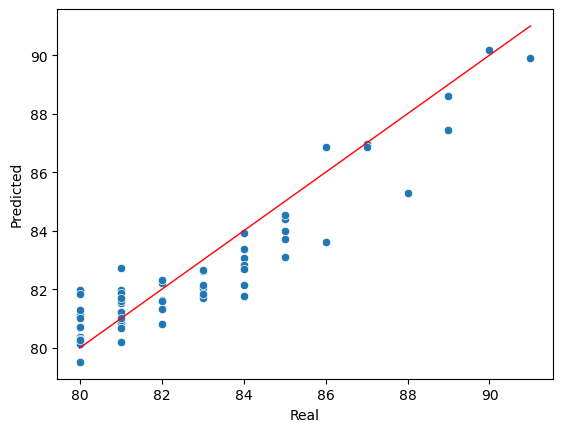

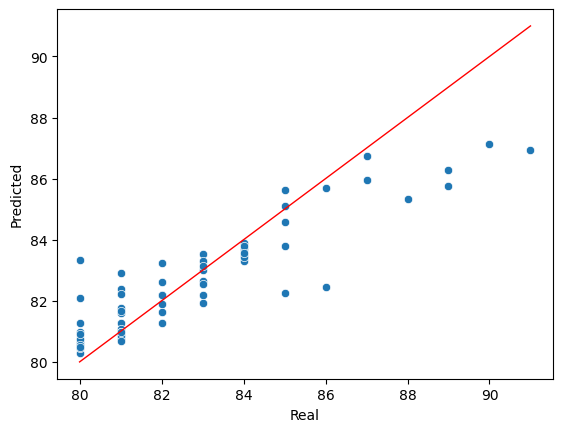

In [63]:
#We plot the graph for the linear regression model
data1 = pd.DataFrame({'Real': y_test, 'Predicted': y_pred_test})

sns.scatterplot(data=data1, x='Real', y='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', lw=1)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

#We plot the scatter for the random forest regresson
data2 = pd.DataFrame({'Real': y_test, 'Predicted': y_pred_test_rfg})

sns.scatterplot(data=data2, x='Real', y='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', lw=1)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()